<a href="https://colab.research.google.com/github/licciard/fun-stuff/blob/main/math/pilambda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy
import mpmath
import numpy as np
mpmath.mp.dps = 15
print(mpmath.mp)
#sympy.init_session()
sympy.init_printing(use_latex=False)
import scipy.special as scp
import scipy.optimize as opt

import matplotlib.pyplot as plt
%matplotlib inline

zeta_ints = [0,0] + [mpmath.zeta(m) for m in range(2,5000)]

Mpmath settings:
  mp.prec = 53                [default: 53]
  mp.dps = 15                 [default: 15]
  mp.trap_complex = False     [default: False]


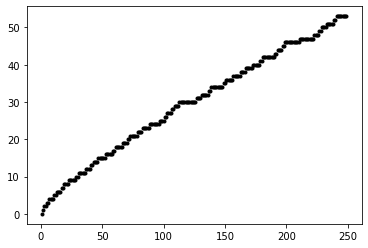

In [ ]:
#dne = np.array([60,70,80,90] + [i*10**exp for exp in range(2,5) for i in range(1, 10)]+[100000])
dx = np.arange(1,250)
ypi = [mpmath.primepi(x) for x in dx]
plt.plot(dx, ypi, 'k.')

<Figure size 360x360 with 0 Axes>

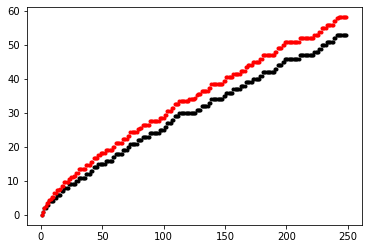

<Figure size 360x360 with 0 Axes>

In [ ]:
def myriemannj(x):
  kmax = int(mpmath.floor(x))
  res = 0
  for k in range(1,kmax+1):
    res += mpmath.primepi(x**(1/k))/k
  return res

ypij = [myriemannj(x) for x in dx]
plt.plot(dx, ypi, 'k.')
plt.plot(dx, ypij, 'r.')

plt.figure(figsize=(5,5))

In [ ]:
def log_zeta_re(t):
  theta = mpmath.exp(t*mpmath.j)
  zetat = mpmath.zeta(1+theta)
  return mpmath.re(mpmath.log(zetat))

def integrand(t,n):
  return log_zeta_re(t)*mpmath.power(2*mpmath.cos(t/2),n-1)*mpmath.cos((n+1)*t/2)

mpmath.mp.dps = 15
for n in range(1,15):
  coef = 2*n/(mpmath.pi)
  integ = coef* mpmath.quad(lambda t: integrand(t,n),[0,mpmath.pi])
  print("{}: {}".format(n,integ))

1: 0.577215664901533
2: 0.966885096962701
3: 1.2206969282167
4: 1.37558813187126
5: 1.45826850019717
6: 1.48829832721222
7: 1.48019084023884
8: 1.44485574411943
9: 1.3905964067913
10: 1.32380368369629
11: 1.24944277582208
12: 1.17139824693906
13: 1.09272131711461
14: 1.01580941259033


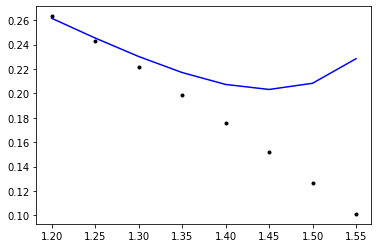

In [ ]:
def log_zeta_repi_int(x,t):
  return myriemannj(x)/mpmath.power(x,2+mpmath.cos(t)) *mpmath.cos(t/2 - mpmath.sin(t)*mpmath.log(x))

def log_zeta_repi(t,xmax = 10000):
  return 2*mpmath.cos(t/2)*mpmath.quad(lambda x: log_zeta_repi_int(x,t),[1,xmax])

dt = np.arange(1.2,mpmath.pi/2,0.05)
yzetat = [log_zeta_re(t) for t in dt]
yzetapi = [log_zeta_repi(t) for t in dt]

plt.plot(dt, yzetat, 'k.')
plt.plot(dt, yzetapi, 'b-')


In [ ]:
def theta_int(t,x,n):
  return mpmath.power(2*mpmath.cos(t/2),n)*mpmath.cos((n+1)*t/2)*mpmath.power(x,-mpmath.cos(t))*mpmath.cos(t/2 - mpmath.sin(t)*mpmath.log(x))

def theta(x,n):
  return 2*n/mpmath.pi * mpmath.quad(lambda t: theta_int(t, x,n),[0,mpmath.pi/2])#,method='tanh-sinh')

#du = np.arange(0.001, 1, 0.001)

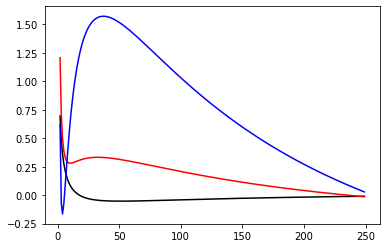

In [ ]:
ytheta1 = np.array([theta(x,1) for x in dx])
plt.plot(dx, ytheta1, 'k-')
ytheta2 = np.array([theta(x,2) for x in dx])
plt.plot(dx, ytheta2, 'r-')
ytheta3 = np.array([theta(x,3) for x in dx])
plt.plot(dx, ytheta3, 'b-')
#ytheta4 = np.array([theta(x,4) for x in dx])
#plt.plot(dx, ytheta4/ytheta3, 'g-')

In [ ]:
def lambda_int(x,n):
  return myriemannj(x)/(x*x) * theta(x,n)

def lambda_tilde(n,xmax):
  return mpmath.quad(lambda x: lambda_int(x, n),[1,xmax])

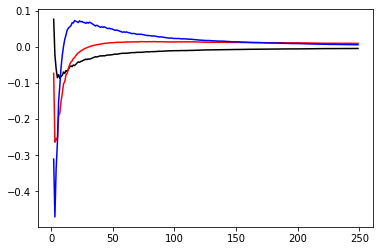

In [ ]:
ylambda1 = np.array([lambda_int(x,1) for x in dx])
plt.plot(dx, ylambda1, 'k-')
ylambda2 = np.array([lambda_int(x,2) for x in dx])
plt.plot(dx, ylambda2, 'r-')
ylambda3 = np.array([lambda_int(x,3) for x in dx])
plt.plot(dx, ylambda3, 'b-')


In [ ]:
for n in range(1,50):
  print("{}: {}".format(n,lambda_tilde(n,10)))

1: -0.467087269933003
2: -1.36620965679978
3: -1.34320439000779
4: -0.451579886914626
5: 0.789966702415915


KeyboardInterrupt: ignored